In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv("input/pln-mobile/review-pln-mobile.csv")

In [3]:
reviews

,Unnamed: 0,rating,waktu,ulasan
0,1,5,2022-06-23 15:33:45,"Sangat membantu,urusan jadi lebih mudah. Namun..."
1,2,1,2022-06-23 15:00:18,Udah pengajuan menambah speed iconnet dari 10m...
2,3,1,2022-06-23 14:59:38,Aplikasi membingungkan. Bagaimana pelanggan ak...
3,4,1,2022-06-23 14:43:33,Kan sy mau pasang iconnet nih terus tdi teknis...
4,5,5,2022-06-23 14:17:21,"Kenapa pln mobil blum bisa top up saldo,kog ma..."
...,...,...,...,...
995,996,5,2022-01-09 21:30:50,Mengapa fitur data pembayaran yg sdh dilakukan...
996,997,5,2022-01-09 20:51:30,"Sesuai motonya ""semua makin mudah"", Laporan Ga..."
997,998,4,2022-01-05 18:15:50,"Say kasih bintang 4 dulu,saya sangat kesulitan..."
998,999,2,2022-01-03 14:02:40,"Untuk menu penyambungan baru, ketika menentuka..."


In [5]:
# create functions for preprocessing

import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtags
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove links
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line with space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = re.sub(r'[^\w\s]', '', text) # remove special characters like emojis
    text = text.strip() # remove spaces from both ends of the text

    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [6]:
# preprocessing reviews data

reviews['text_clean'] = reviews['ulasan'].apply(cleaningText)
reviews['text_clean'] = reviews['text_clean'].apply(casefoldingText)
reviews.drop(['ulasan'], axis = 1, inplace = True)

In [8]:
reviews.head()

,Unnamed: 0,rating,waktu,text_clean
0,1,5,2022-06-23 15:33:45,sangat membantuurusan jadi lebih mudah namun b...
1,2,1,2022-06-23 15:00:18,udah pengajuan menambah speed iconnet dari mbp...
2,3,1,2022-06-23 14:59:38,aplikasi membingungkan bagaimana pelanggan aka...
3,4,1,2022-06-23 14:43:33,kan sy mau pasang iconnet nih terus tdi teknis...
4,5,5,2022-06-23 14:17:21,kenapa pln mobil blum bisa top up saldokog mas...


In [9]:
reviews['text_preprocessed'] = reviews['text_clean'].apply(tokenizingText)
reviews['text_preprocessed'] = reviews['text_preprocessed'].apply(filteringText)
reviews['text_preprocessed'] = reviews['text_preprocessed'].apply(stemmingText)

In [10]:
reviews.drop_duplicates(subset = 'text_clean', inplace = True)
reviews.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [11]:
reviews.head()

,rating,waktu,text_clean,text_preprocessed
0,5,2022-06-23 15:33:45,sangat membantuurusan jadi lebih mudah namun b...,"[membantuurusan, mudah, buka, aplikasi, berat,..."
1,1,2022-06-23 15:00:18,udah pengajuan menambah speed iconnet dari mbp...,"[udah, aju, tambah, speed, iconnet, mbps, mbps..."
2,1,2022-06-23 14:59:38,aplikasi membingungkan bagaimana pelanggan aka...,"[aplikasi, bingung, langgan, paham, slo, nidi,..."
3,1,2022-06-23 14:43:33,kan sy mau pasang iconnet nih terus tdi teknis...,"[sy, pasang, iconnet, nih, tdi, teknisi, sdh, ..."
4,5,2022-06-23 14:17:21,kenapa pln mobil blum bisa top up saldokog mas...,"[pln, mobil, blum, top, up, saldokog, lwat, ac..."


In [12]:
# Export to csv file
reviews.to_csv('input/pln-mobile/review-pln-mobile-clean.csv', index = False, header = True,index_label=None)

In [13]:
# Because preprocessing tweets data takes a lot time, so I load tweets data which has been preprocessed before
reviews_ = pd.read_csv('input/pln-mobile/review-pln-mobile-clean.csv')

for i, text in enumerate(reviews_['text_preprocessed']):
    reviews_['text_preprocessed'][i] = reviews_['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in reviews_['text_preprocessed'][i].split():
        list_words.append(word)
        
    reviews_['text_preprocessed'][i] = list_words   
    
reviews_

C:\Users\waviv\AppData\Local\Temp\ipykernel_14480\3170973151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_['text_preprocessed'][i] = reviews_['text_preprocessed'][i].replace("'", "")\
C:\Users\waviv\AppData\Local\Temp\ipykernel_14480\3170973151.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_['text_preprocessed'][i] = list_words
C:\Users\waviv\AppData\Local\Temp\ipykernel_14480\3170973151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,rating,waktu,text_clean,text_preprocessed
0,5,2022-06-23 15:33:45,sangat membantu urusan jadi lebih mudah namun ...,"[membantu, urusan, mudah, buka, aplikasi, bera..."
1,1,2022-06-23 15:00:18,udah pengajuan menambah speed iconnet dari mbp...,"[udah, aju, tambah, speed, iconnet, mbps, mbps..."
2,1,2022-06-23 14:59:38,aplikasi membingungkan bagaimana pelanggan aka...,"[aplikasi, bingung, langgan, paham, slo, nidi,..."
3,1,2022-06-23 14:43:33,kan sy mau pasang iconnet nih terus tdi teknis...,"[sy, pasang, iconnet, nih, tdi, teknisi, sdh, ..."
4,5,2022-06-23 14:17:21,kenapa pln mobil blum bisa top up saldokog mas...,"[pln, mobil, blum, top, up, saldokog, lwat, ac..."
...,...,...,...,...
995,5,2022-01-09 21:30:50,mengapa fitur data pembayaran yg sdh dilakukan...,"[fitur, data, bayar, yg, sdh, banding, versi, ..."
996,5,2022-01-09 20:51:30,sesuai motonya semua makin mudah laporan gangg...,"[sesuai, moto, mudah, lapor, gangguankeluhan, ..."
997,4,2022-01-05 18:15:50,say kasih bintang dulusaya sangat kesulitan w...,"[say, kasih, bintang, dulusaya, sulit, masuk, ..."
998,2,2022-01-03 14:02:40,untuk menu penyambungan baru ketika menentukan...,"[menu, sambung, tentu, titik, lokasi, terang, ..."


Sentiment Polarity of Reviews (with Indonesia Sentiment Lexicon)

In [24]:
lexicon_positive_df = pd.read_csv('input/kamus-sentimen/lexicon_positive.csv', delimiter=";")
lexicon_negative_df = pd.read_csv('input/kamus-sentimen/lexicon_negative.csv', delimiter=";")

In [35]:
lexicon_positive_dict = {}
for index, row in lexicon_positive_df.iterrows():
    lexicon_positive_dict[row['word']] = int(row['weight'])

lexicon_negative_dict = {}
for index, row in lexicon_negative_df.iterrows():
    lexicon_negative_dict[row['word']] = int(row['weight'])

# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [36]:
# Results from determine sentiment polarity of tweets

results = reviews['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
reviews['polarity_score'] = results[0]
reviews['polarity'] = results[1]
print(reviews['polarity'].value_counts())

# Export to csv file
# tweets.to_csv(r'25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

reviews

polarity
negative    585
positive    349
neutral      66
Name: count, dtype: int64


,rating,waktu,text_clean,text_preprocessed,polarity_score,polarity
0,5,2022-06-23 15:33:45,sangat membantuurusan jadi lebih mudah namun b...,"[membantuurusan, mudah, buka, aplikasi, berat,...",7,positive
1,1,2022-06-23 15:00:18,udah pengajuan menambah speed iconnet dari mbp...,"[udah, aju, tambah, speed, iconnet, mbps, mbps...",-7,negative
2,1,2022-06-23 14:59:38,aplikasi membingungkan bagaimana pelanggan aka...,"[aplikasi, bingung, langgan, paham, slo, nidi,...",2,positive
3,1,2022-06-23 14:43:33,kan sy mau pasang iconnet nih terus tdi teknis...,"[sy, pasang, iconnet, nih, tdi, teknisi, sdh, ...",2,positive
4,5,2022-06-23 14:17:21,kenapa pln mobil blum bisa top up saldokog mas...,"[pln, mobil, blum, top, up, saldokog, lwat, ac...",9,positive
...,...,...,...,...,...,...
995,5,2022-01-09 21:30:50,mengapa fitur data pembayaran yg sdh dilakukan...,"[fitur, data, bayar, yg, sdh, banding, versi, ...",-14,negative
996,5,2022-01-09 20:51:30,sesuai motonya semua makin mudah laporan gangg...,"[sesuai, moto, mudah, lapor, gangguankeluhan, ...",13,positive
997,4,2022-01-05 18:15:50,say kasih bintang dulusaya sangat kesulitan w...,"[say, kasih, bintang, dulusaya, sulit, masuk, ...",-3,negative
998,2,2022-01-03 14:02:40,untuk menu penyambungan baru ketika menentukan...,"[menu, sambung, tentu, titik, lokasi, terang, ...",-22,negative


In [37]:
# Export to csv file
# reviews.to_csv(r'reviews_clean_polarity.csv', index = False, header = True,index_label=None)

Exploratory Data Analysis

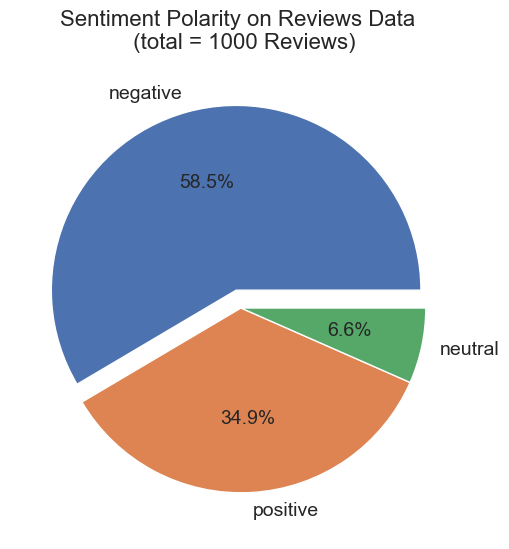

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in reviews['polarity'].value_counts()]
labels = list(reviews['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Reviews Data \n (total = 1000 Reviews)', fontsize = 16, pad = 20)
plt.show()

Top 10 Positive Reviews

In [45]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = reviews[reviews['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,untuk pelayanan iconnet pln mohon proses pasang baru di mudahkan ketersediaan jaringan iconnet di lingkungan sdh banyak jaringan pakai langganan indihometelkomsel banyak masyarakat yg tertarik pada iconnet dan berkeinginan ganti dari indihome ke iconnet pln tapi tidak bisa terealisasi karena jaringan tidak ada mohon ketersediaan jaringannya dan proses pasang baru semakin baik,30,positive
2,mantap cepat tanggap ga lama langsung di telpon sama yang bertugas alhamdulillah karna respon ya cepat jadi ga sampai gelapgelapan malam ini tengkyu good job pln,25,positive
3,kenapa sekarang ga bisa lihat historis penggunaan syang sekali alhamdulillah sekarang mah udah bisa dan aq kasih bintang deh karena memang memudahkan banget buat kita bisa catat meter sendiri dan hasilnya pun akurat terimakasih pln mobile sudah memudahkan kita,25,positive
4,terimakasih dengan adanya apk pln mobile sangat dan sangat membantu praktis dan nyaman respon cepat dan tepat klo ada seribu bintangnya pasti ku klik semua trimakasih atas kerja samanya,23,positive
5,terima kasih pt pln atas kemudahan yang diberikan melalui aplikasi ini semoga semakin berkembang dan meningkat namun tetap stabil salah satunya biaya layanan jangan hanya di awal saja yang gratis namun semakin kesini di stabilkan sekarang pilihpilih menggratiskannya kalau saya lihat pake mandiri baru bisa gratis tidak seperti promosi awal duluu,23,positive
6,saya tambah daya menggunakan vocher panjang lebar berhari debat dengan kantor pln setempat karena banyak alasan intinya tidak mau melayani tambah daya menggunakan vocher dan akhirnya berhasil juga pasang tambah daya intinya jika pln setempat tidak mau melayani laporkan saja ke nomor terimakasih buat pelayanan sangat memuaskan,22,positive
7,pln mobile semakin ok aja banyak fitur fitur tambahan yg menarik ada juga pengumpulan poin voucher dan undian berhadiah wah sayang kalo ga di gunakan pokoknya mantablayak kasih bintang terimakasih pln mobile,22,positive
8,selamat sore min beserta kru lainnya dan segenap manajemen semoga selalu dalam keadaan sehat lahir batin maaf sedikit saran kalau bisa appnya bisa seperti app telpon yang tercantum sisa pulsavoucher listrik jika sudah terhubung dgn nomer meteran dan voucher bisa otomatis terisi jika sudah dibeli tidak lagi di input manual untuk sementara sekian dulu dari saya terimakasih salam hormat dan sehat selalu,22,positive
9,tools yang lebih memudah kan untuk registrasi dan cepat ditanganin bila ada keluhan dan lebih memudahkan untuk program pengisian token alhamdulillah kami dapat program tambah daya yang sangat murah karena berbarengan dengan pemasangan internet iconnet tingkatkan terus pln serta ditunggu program promo nya terutama untuk promo pada potongan harga isi token nya terimakasih,22,positive
10,proses refaund udah hari ke belum kembali mau ikutan promo naik daya malah udah gak promo barang udah di batalin eh malah uangnya gak kembalidi chat harus nunggu email tidak ada kepastian waktu tolong proses secepatnya nomer lapor dimohon dengan sangat bp ibu pln tolong bantu saya saya kasih bintang klo uang sudah kembali terimakasih,21,positive


Top 10 Negative Reviews

In [44]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = reviews[reviews['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,kesel bgt beli token hari ini beli via va udh bayar via mbanking dan uang gua udh ketarik dan notif pembayaran udh masuk k email utk mastiin tapi di aplikasi ini statusnya masih menunggu pembayaran sampe sekarang udh kedaluwarsa status pembayaran dan ga dpt nomor token nya sama sekali coba layanan pengaduan malah gabisa digunain live chat nya malah gabisa ngetik awalnya gua pikir d hp gua doag gabisa gua cobain d hp lain sama aja gabisa kesel bgt rugi,-42,negative
2,saya rasakan aplikasi sekarang mh ribet kalau daftar penyambungan baru mesti masukin nid sedangkan kita masyarakat biasa ga tau nid dan ujung ujung nya kita ga bisa daftar kalau aplikasi dulu daftar terus bayar via atm beres tinggal nunggukwh sekarang mah ribeet,-40,negative
3,aplikasi mantab gampang beli token listrik serius gak kena biaya adm lho kalau beli lwt mbanking kena adm minimal lwt aplikasi ini gratististiscoba aja kali isi ulang token dikali perak berapa uang kalian yg hilang kalau beli pulsa listriknya lwt mbangkingmakanya ayoo isi token lwt aplikasi pln mobile,-40,negative
4,bintang sengaja supaya direspon fitur pembayaran pascabayar via appnya kok udah bayar tapi masih muncul tagihan di halaman utama meski pas di klik lagi tertera belum ada tagihan tapi balik ke halaman utama meski direfresh berkali tetep ada info tagihan gak auto update infonya benerin donk yang ada takutnya bentrok sama petugas penagih yang datang ke rumah karena di apps masih belum ada bukti pembayaran dan malah masih tertera tagihan di halaman utama,-37,negative
5,token rusak asal mau isi token kena hubungi pln padahal token masih ada sisa waktu input no gagal trs tertetara tulisan periksa tapi dibilang gak apa waktu isi ribetnya minta ampun kena hubungin pln tolong ditukar,-31,negative
6,app yg masih mentah ferivikasi saja sangat lama jam bahkan bisa lebih lama pasang baru pln jadi lebih ribet lebih pemborosan waktu dan pulsa app kalau dari awal lemot respon dan ribet seharusnya pln milik negara itu ada layanan tlp bebas pulsa jangan keluarkan app tapi masih orang harus tlp yg mahal app ini gak layak untuk pasang baru pengaduan gangguan pasti akhirnya respon lama dan bikin ribet,-30,negative
7,aplikasi sdh bagus kekurangan nya tdk bisa update data pelanggan saya tidak bisa mengecek tagihan icconet karena saat daftar icconet tidak melalui aplikasi pln mobile semoga kedepan update data pelanggan bisa dilakukanbiar saat cek tagihan seperti listrik internet cukup melalui aplikasi pln mobilethanks,-30,negative
8,ini knp y hari ini aplikasi mobile pln setelah update jadi ga bisa pilih pengaduan data kosong terussaya sudah ikutin arahan hapus cache dan isi form tetep aja data kosong di sub menu pengaduan ya,-30,negative
9,parah jelek bgt ga profesional aplikasi dan pelayanan sangat buruk saya transfer untuk belanja d marketplace transfer berhasil tapi di aplikasi pembayaran gagal detile transaksi tidak bisa d akses buat bukti parah,-29,negative
10,aplikasinya sangat mempermudah tapi petugasnya gak becus apa iya kita udah korbanin pulsa buat nelpon untuk pengaduan setelah selesai pengaduan saya cek status pengaduannya udah selesai padahal belum di selesaikan sama sekali mana meternya udah mau mati,-28,negative


Visualization using Wordcloud

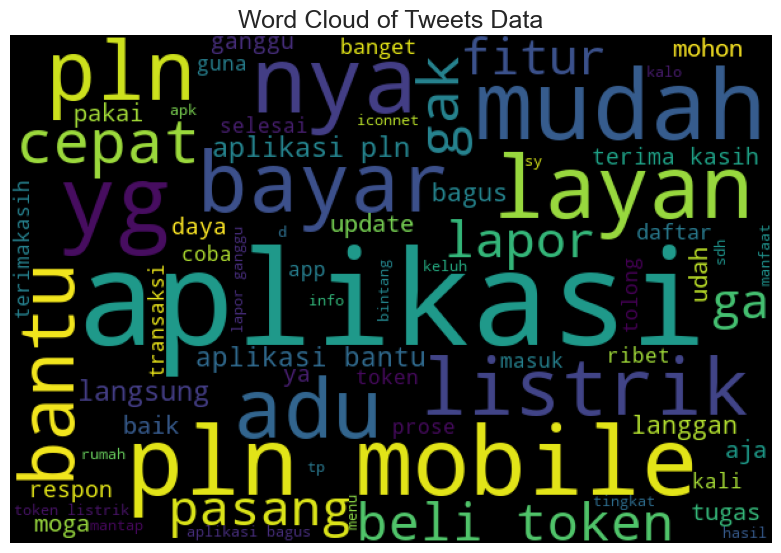

In [46]:
# Visualize word cloud
from wordcloud import WordCloud

list_words=''
for review in reviews['text_preprocessed']:
    for word in review:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

Positive and Negative Word Cloud

In [48]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive_dict):
            score_pos = lexicon_positive_dict[word]
        if (word in lexicon_negative_dict):
            score_neg = lexicon_negative_dict[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

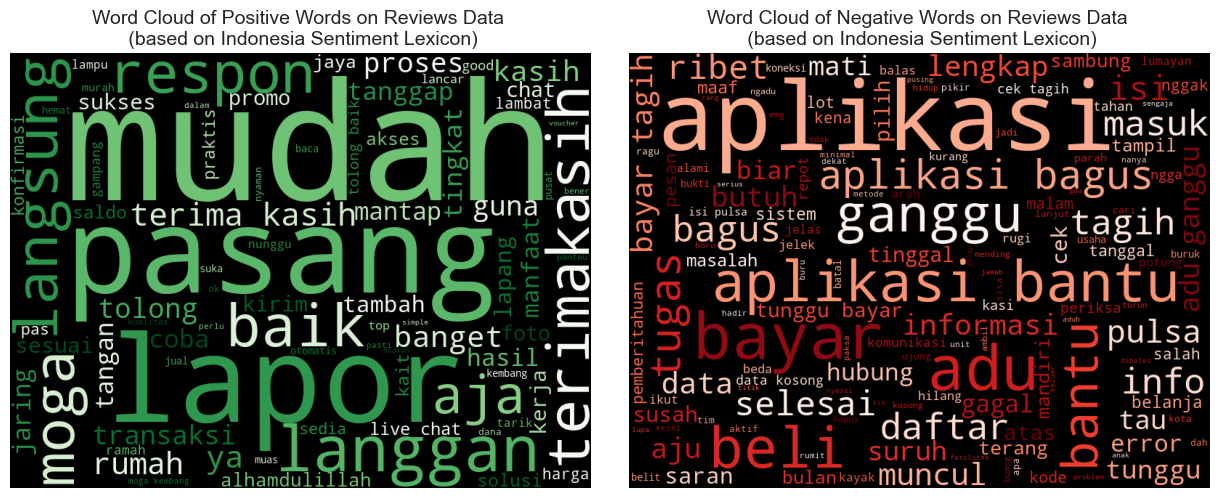

In [49]:
# Visualize positive and negative word cloud

sentiment_words = reviews['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Reviews Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Reviews Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

## Sentiment Analysis with LSTM

Preprocessing Text Data

In [62]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
# from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [63]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function

X = reviews['text_preprocessed'].apply(toSentence) 
max_features = 5000

# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(1000, 63)

In [64]:
# Encode target data into numerical values
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
y = reviews['polarity'].map(polarity_encode).values

# Split the data (with composition data train 80%, data test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 63) (800,)
(200, 63) (200,)


Create Model LSTM

In [65]:
# Create model function with default hyperparameter values

def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [ ]:
# # Hyperparameter tuning (to know the best hyperparameter for this model)

# # Wrapper model with default hyperparameter values
# model = KerasClassifier(dropout_rate=0.2, embed_dim=32, hidden_unit=16, learning_rate=0.01,
#                         build_fn = create_model, epochs = 25, batch_size=128) 

# # Hyperparameters
# embed_dim = [32, 64]
# hidden_unit = [16, 32, 64]
# dropout_rate = [0.2]
# optimizers = [Adam, RMSprop]
# learning_rate = [0.01, 0.001, 0.0001]
# epochs = [10, 25, 50, 100]
# batch_size = [128, 256]
# param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate,
#                   learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# # Evaluation model with GridSearchCV to know what the best hyperparameter for model 
# grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
# grid_result = grid.fit(X_train, y_train)

# results = pd.DataFrame()
# results['means'] = grid_result.cv_results_['mean_test_score']
# results['stds'] = grid_result.cv_results_['std_test_score']
# results['params'] = grid_result.cv_results_['params']
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# results.to_csv(r'gridsearchcv_results.csv.csv', index = False, header = True)
# results.sort_values(by='means', ascending = False).reset_index(drop=True)

In [80]:
# From results above, we know the best hyperparameter for this model is :
# {'batch_size': 128, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 25, 'hidden_unit': 16, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizers.RMSprop'>}

# Create the model with the best hyperparameter which has been determined
model = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 32,
                        hidden_unit = 16,
                        optimizers = RMSprop,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=25, 
                        batch_size=128,
                        # Initiate validation data, which is 10% data from data train. It's used for evaluation model
                        validation_split = 0.1)
                         

model_prediction = model.fit(X_train, y_train)

c:\Users\waviv\OneDrive\Documents\Working Folder\2023\Testing Project\sentiment_analysis_pln_mobile\venv_sa_plnm\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Model: "sequential_702"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_702 (Embedding)   (None, 63, 32)            160000    
                                                                 
 lstm_702 (LSTM)             (None, 16)                3136      
                                                                 
 dropout_702 (Dropout)       (None, 16)                0         
                                                                 
 dense_702 (Dense)           (None, 3)                 51        
                                                                 
Total params: 163187 (637.45 KB)
Trainable params: 163187 (637.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/25
6/6 [==============================] - 3s 108ms/step - loss: 1.0866 - accuracy: 0.3722 - val_loss: 1.0708 - val_accuracy: 0.3250

In [82]:
model_prediction

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x000002369C110550>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=25
	dropout_rate=0.2
	embed_dim=32
	hidden_unit=16
	optimizers=<class 'keras.src.optimizers.rmsprop.RMSprop'>
	learning_rate=0.001
	class_weight=None
)

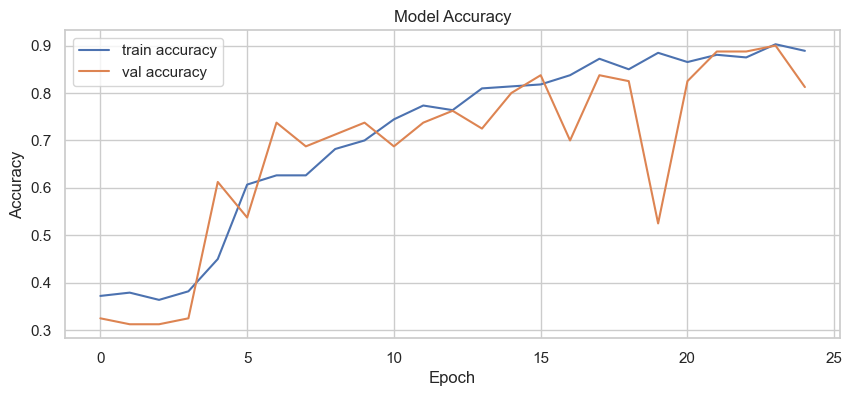

In [83]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history_['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history_['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
import seaborn as sn
from pandas import DataFrame
confm = confusion_matrix(y_true, y_pred)
columns = ['negatif','positif','netral']
df_cm = DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

2/2 [==============================] - 0s 9ms/step
Model Accuracy on Test Data: 0.76


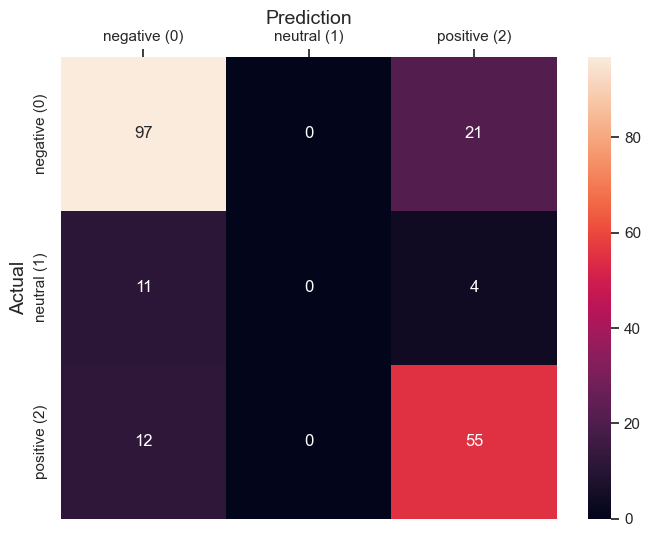

In [84]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
plt.show()

In [86]:
# Results from prediction sentiment on data test
text_clean = reviews['text_clean']
text_train, text_test = train_test_split(text_clean, test_size = 0.2, random_state = 0)
result_test = pd.DataFrame(data = zip(text_test, y_pred), columns = ['text', 'polarity'])
polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
result_test['polarity'] = result_test['polarity'].map(polarity_decode)
pd.set_option('max_colwidth', 300)
result_test

,text,polarity
0,aplikasi pln mobile memang keres banget fiturnya lengkap dan sangat membantu memudahkan konsumen bisa diakses kapanpun dan dimanapun cara penggunaannya juga mudah ada berbagai macam menu yang bisa dipakai seperti token pembayaran pengaduan catat meter info stimulus penyambungan baru perubahan ...,Positive
1,allikasi bagus dan membantu bnget tapi usul saya jgn lagi keterangan nyala padahal dilapangan belum nyalakrna saya suka kesal gitu atau buat peningkatan kalau saya lapor trus ditanggapi dan dinyatakan nyala saya harus minta konfirmasi pelapor dlu akan kebenaran nyakrna ptugas kadang mnipulasi ke...,Positive
2,aplikasi error aplikasi nya sakit sudah melakukan pendaftaran iconnet dari tgl mei dan telah melakukan pembayaran tapi sampai saat ini belum ada konfirmasi mengenai pemasangan anehnya pada aplikasi meminta melakukan pembayaran tagihan sdah melakukan konfirmasi wa dari cc tapi tdak ada balasan ...,Negative
3,saran dari saya yang pengguna listrik pascabayar tolong ditingkatkan lagi fitur perihal tagihan listrik jadi kalo semisal ada tunggakan nantinya bisa diakumulasi dengan bulan berikutnya jangan dibuat perbulan gitu dikhawatirkan ada miskomunikasi antara yang di aplikasi dengan yang di lapang apal...,Positive
4,membantu bgt dan cepat pelayanan nya utk kita yg di desa catur tamban coba aja deh kalian yg kwh meter nya lagi error download aja aplikasi ini langsung aja ajukan pengaduan di sini gk lama pasti deh ponsel kalian berdering dan perbaikan pun langsung on proses terimakasih pln kapuas trimakasih u...,Positive
...,...,...
195,sdh coba logout dan login kembali tp masalah sblmnya tetap ada sy malah menemukan lebih banyak kekacauan di apps ini pembayaran atau pembelian voucher sy tdk tercatat dan sy diminta bayar lg sementara untuk permohonan migrasi tidak jelas juntrungannya hadeuh kumaha pln kok tdk hire programmer yg...,Negative
196,cukup enak cukup lancar cuma kadang gangguan moga pln tetap jaya dan dalam pasang baru smg materialnya selalu lengkap,Positive
197,mantap dengan adanya aplikasi pln mobile untuk sistem pengaduan ke pln nya jadi sangat lah mudah,Positive
198,pembayaran tagihan listrik melalui aplikasi mengalami kegagalan pembayaran saldo di bank sudah terpotong tapi di aplikasi pln mobile belum terbayar masalah sudah ditanggapi cs dana akan di kembalikan max hari,Negative


In [87]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = ['aplikasi bagus, pemakaian mudah dan cepat, rekomendasi bagus untuk orang2 yang ingin cepat transaksi mobile via pln',
                     'awalnya sih lancar, cuma makin kesini makin sering error, loading lama, beberapa kali harus restart aplikasi' 
                    ]

otherData['text_clean'] = otherData['text'].apply(cleaningText)
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)

otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

,text_clean,text_preprocessed
0,aplikasi bagus pemakaian mudah dan cepat rekomendasi bagus untuk orang yang ingin cepat transaksi mobile via pln,"[aplikasi, bagus, pakai, mudah, cepat, rekomendasi, bagus, orang, cepat, transaksi, mobile, via, pln]"
1,awalnya sih lancar cuma makin kesini makin sering error loading lama beberapa kali harus restart aplikasi,"[sih, lancar, kesini, error, loading, kali, restart, aplikasi]"


In [88]:
# Preprocessing text data

# Make text preprocessed (tokenized) to untokenized with toSentence Function
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  18,
         36,   4,  13, 969,  18, 196,  13,  54,   7,  55,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 185, 213, 927, 127, 349,  43,   1]])

In [89]:
# Results from prediction sentiment on text data

y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

1/1 [==============================] - 0s 35ms/step


,text_clean,text_preprocessed,Result Prediction
0,aplikasi bagus pemakaian mudah dan cepat rekomendasi bagus untuk orang yang ingin cepat transaksi mobile via pln,"[aplikasi, bagus, pakai, mudah, cepat, rekomendasi, bagus, orang, cepat, transaksi, mobile, via, pln]",Positive
1,awalnya sih lancar cuma makin kesini makin sering error loading lama beberapa kali harus restart aplikasi,"[sih, lancar, kesini, error, loading, kali, restart, aplikasi]",Negative
